<a href="https://colab.research.google.com/github/RajaChowdhury/Airbnb-Bookings-Analysis-EDA-Capstone-Project/blob/main/MY_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> 1. Defining Problem Statement

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **2. Introduction to Airbnb**

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. In general, Airbnb is cheaper than hotels because Airbnb does not have to pay for the overhead costs of a hotel or the general management of such a large operation.

# **3. Steps performed in this EDA Projests**

Handling this dataset with the fundamental steps to unvail the factors :

* Imports Libraries, Dataset and Other modules
* Analysing Data : Reading & Inspection of Data.
    *   Data Structure (Head , Tail or Body)
    *   Data information (basic schema)
    *   Arithmatic measurement (data discriptions)
* Data Preparation & Processing
    *   Data Cleaning
    *   Handling Outliners 
* Exploratory Analysis
    *   Identifying relation of dependent variables with Problemset.
    *   Visualization using differen plots in relation with question.
* Key Findings and Conclusion

# <b>4. Lets Import Required Libraries And Load Our Airbnb Dataset

**Importing Essential Liabraries**


In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster

**Mounting My Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading My Dataset**

In [3]:
path = ("/content/drive/MyDrive/Airbnb Bookings Analysis- EDA Capstone Project- Raja Chowdhury/Airbnb NYC 2019.csv")
df = pd.read_csv(path)

# <b> 5. Exploring Our Airbnb Dataset </b>

Lets dive into the our dataset, we will see top 10 rows, bottom 10 rows, shape, size and many more.

In [4]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [5]:
df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
Row , Column = df.shape
print(f"Number 0f rows is {Row}")
print(f"Number 0f columns is {Column}")

Number 0f rows is 48895
Number 0f columns is 16


In [7]:
# let's look at the statistical aspects of the dataframes
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
#lets check non null values and datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
#lets check the number of unique values in each columns. 
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [13]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# **6. Data Preparation**

using `describe` to get a summary statistics of the numeric data, We can see that the data need cleanning, We Observe that there are some outliers for **price and minimum_nights**. Other columns such as **number_of_reviews and calculated_host_listings_count** are skewed toward right, so we need to transfer them into categorical variables.


###**Treating Null Values**

In [14]:
#lets check Number Of Null Values In Our Columns
for i in df.columns:
    ab = df[i].isnull().sum()
    if ab != 0:
        print(i + " column has {} null values.".format(ab))
        print()

name column has 16 null values.

host_name column has 21 null values.

last_review column has 10052 null values.

reviews_per_month column has 10052 null values.



In [15]:
# Let's check for The Percentage Of Null Values In our columns.
Total = df.isnull().sum().sort_values(ascending=False)
Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([Total,Percentage], axis=1, keys=['Total','Percentage']) 
missing_value

,Total,Percentage
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


As we can see there are some Null Values in **host_name**, **name** , **last_review** and **reviews_per_month** 

<u/>**last_review**</u> : As we can see that last_review column has more than 20% of the null values and this is quite irrelevant column for our analysis so we can simply drop this column.

<u/>**host_name** & **name**</u> : Missing Values are 21 & 16 both are less than 0.5% so will simple drop the rows corresponding to the missing values.

<u/>**reviews_per_month**</u> : we found Null Values are for those properties which doesn't have any reviews. so will replace all the Null values of review_per_month with zero ('0').

In [16]:
#Dropping null values column
df.drop(['last_review'], axis=1,inplace=True)

In [17]:
#Dropping null values rows
df.dropna(subset=['name', 'host_name'], axis=0,inplace=True)

In [18]:
#Making function for imputing zero in place of null values
def impute_zero(series):
    return series.fillna(0)

df.reviews_per_month=df["reviews_per_month"].transform(impute_zero)

In [19]:
#Better To Double Check
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

###**Removing Zero Price ValueS**

In [20]:
df[df.price==0].shape

(11, 15)

**We can clearly see the total of eleven entries need to be drop whose 
price is 0 so going forward excluding those entries having price = 0.**

In [21]:
df = df[df['price'] !=0]

In [22]:
#Shape of our dataset after treatment of null values and eliminatimg prices having zero values.
df.shape

(48847, 15)

## **Handing Outliners**

In [23]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.884700e+04,4.884700e+04,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000
mean,1.902300e+07,6.763372e+07,40.728945,-73.952176,152.774705,7.012365,23.270621,1.091014,7.149016,112.799599
std,1.098410e+07,7.862959e+07,0.054529,0.046161,240.248498,20.021362,44.550647,1.597200,32.968270,131.615947
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475094e+06,7.814734e+06,40.690090,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.968202e+07,3.079133e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915833e+07,1.074344e+08,40.763110,-73.936295,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


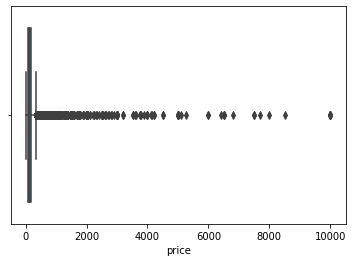

In [24]:
sns.boxplot(x=df['price'])

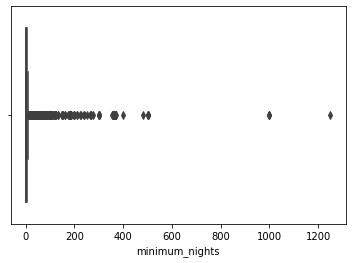

In [25]:
sns.boxplot(x=df['minimum_nights'])

In [26]:
df['z_price'] = np.abs(stats.zscore(df['price']))
df['z_min_nights'] = np.abs(stats.zscore(df['minimum_nights']))

In [27]:
# remove z scroe that are greater than 3

df = df[(df['z_price'] < 3)]
df = df[(df['z_min_nights'] < 3)]

In [28]:
# Droping 'z_price' and 'z_min_nights'
df.drop(['z_price','z_min_nights'],axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48149 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48149 non-null  int64  
 1   name                            48149 non-null  object 
 2   host_id                         48149 non-null  int64  
 3   host_name                       48149 non-null  object 
 4   neighbourhood_group             48149 non-null  object 
 5   neighbourhood                   48149 non-null  object 
 6   latitude                        48149 non-null  float64
 7   longitude                       48149 non-null  float64
 8   room_type                       48149 non-null  object 
 9   price                           48149 non-null  int64  
 10  minimum_nights                  48149 non-null  int64  
 11  number_of_reviews               48149 non-null  int64  
 12  reviews_per_month               

## **Finding Relation and Dependencies In Data**

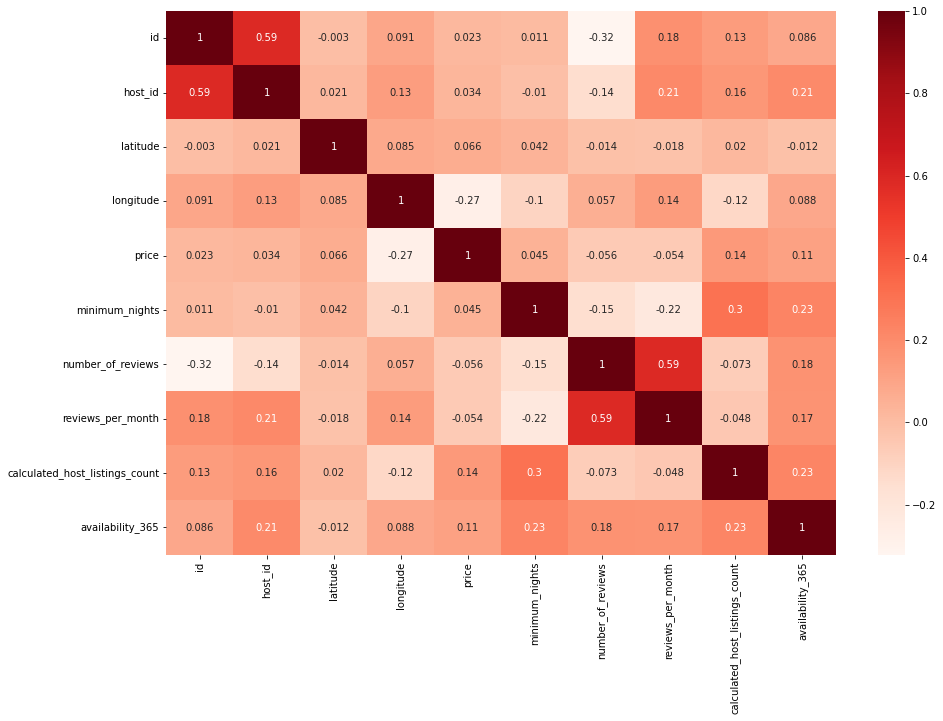

In [30]:
#let's analysize if there is any numerical corelation.
plt.figure(figsize=(15,10))
abnb_corr = df.corr()
heatmap=sns.heatmap(abnb_corr ,cbar=True,annot=True, cmap="Reds")

**We did not found any pleasing correlation between the numerical variables except number of reviews and reviews per month.**

# **7. Data Visualization**

## **Some Basic Visualization Of Our Data.**

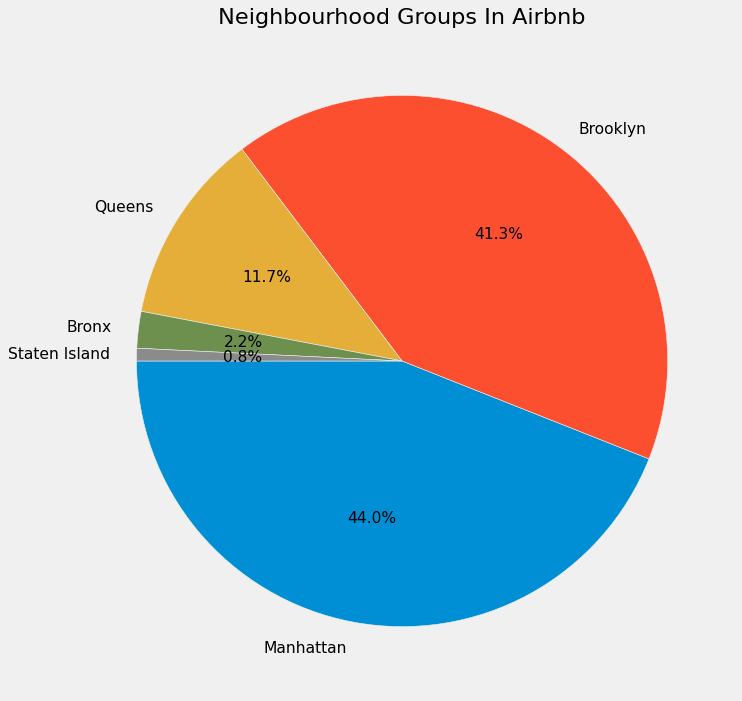

In [49]:
# Neighbourhood Groups in Airbnb

plt.style.use('fivethirtyeight')
explode = [0,0,0,0,0]
plt.figure(figsize=(12,10))
plt.title("Neighbourhood Groups In Airbnb")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

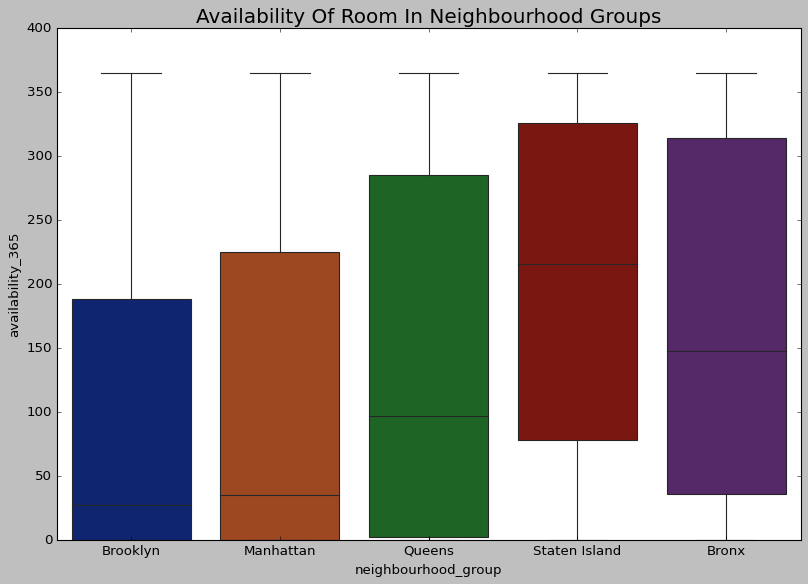

In [51]:
# Availability Of Room In Neighbourhood Groups

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Availability Of Room In Neighbourhood Groups",color = 'black',fontsize = 18)
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

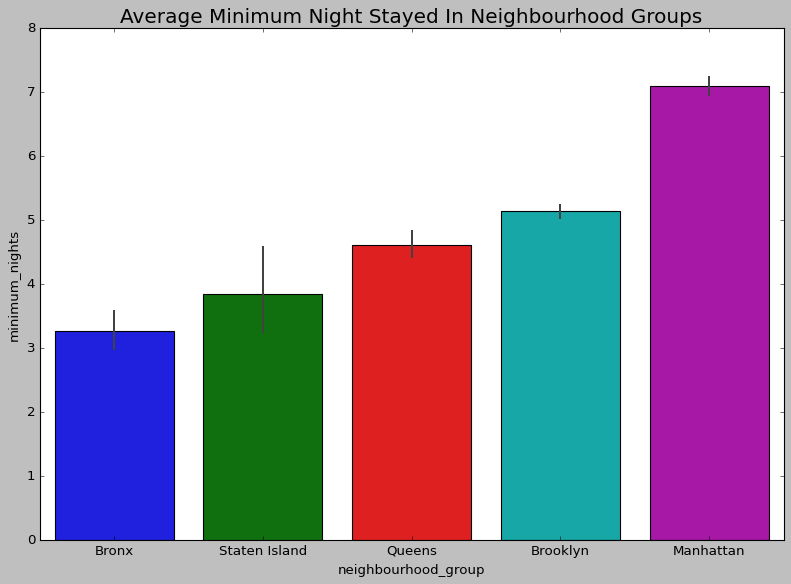

In [52]:
# Minimum Night Stayed In Neighbourhood Groups

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Minimum Night Stayed In Neighbourhood Groups",color = 'black',fontsize = 18)
result = df.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.mean).reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=df, order=result['neighbourhood_group']) 
plt.show()

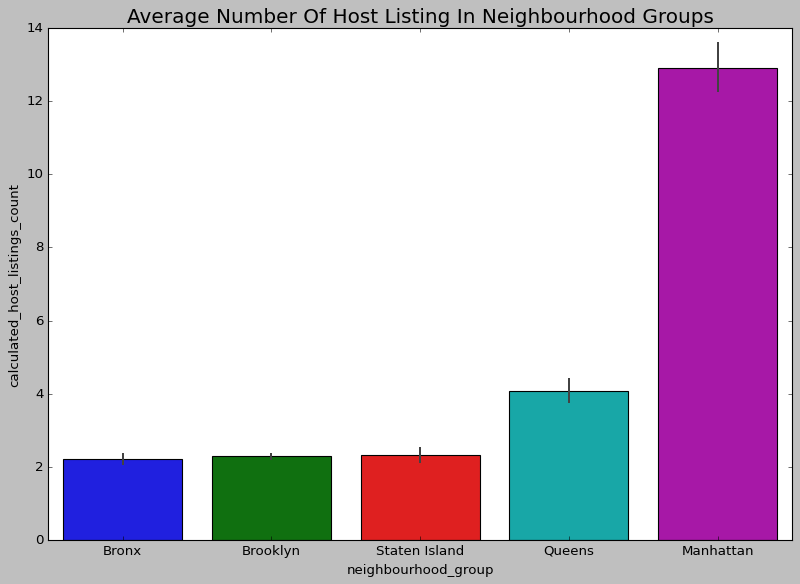

In [56]:
# Number Of Host Listing In Neighbourhood Groups

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Number Of Host Listing In Neighbourhood Groups",color = 'black',fontsize = 18)
result = df.groupby(["neighbourhood_group"])['calculated_host_listings_count'].aggregate(np.mean).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='neighbourhood_group', y="calculated_host_listings_count", data=df, order=result['neighbourhood_group'])
plt.show()

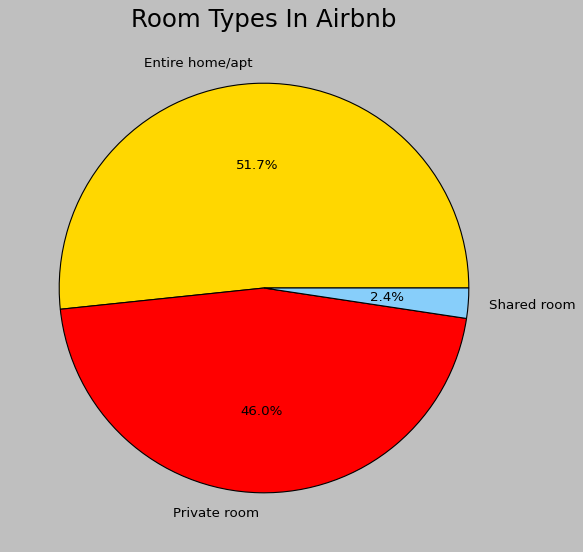

In [64]:
# Room Types In Airbnb

labels = df.room_type.value_counts().index
colors = ['gold','red','lightskyblue']
explode = [0,0,0]
sizes = df.room_type.value_counts().values
plt.figure(0,figsize = (10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Room Types In Airbnb',color = 'black',fontsize = 22)
plt.show()

 ## **What can we learn about different hosts and areas?**

In [31]:
Long=-73.935242
Lat=40.730610
locations = list(zip(df.latitude, df.longitude))
map1 = folium.Map(location=[Lat,Long], zoom_start=10.2)
FastMarkerCluster(data=locations).add_to(map1)
map1

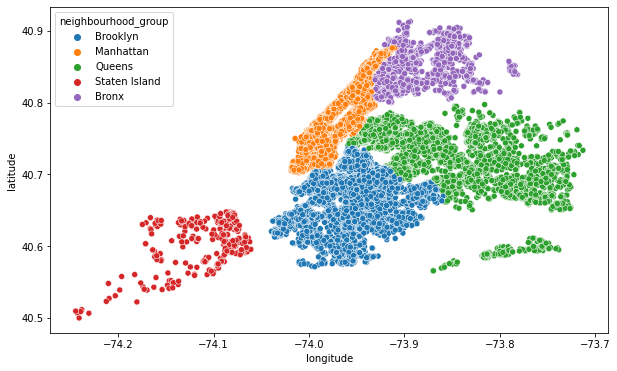

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

## **What can we learn from predictions? (ex: locations, prices, reviews, etc)**

<Figure size 960x800 with 0 Axes>

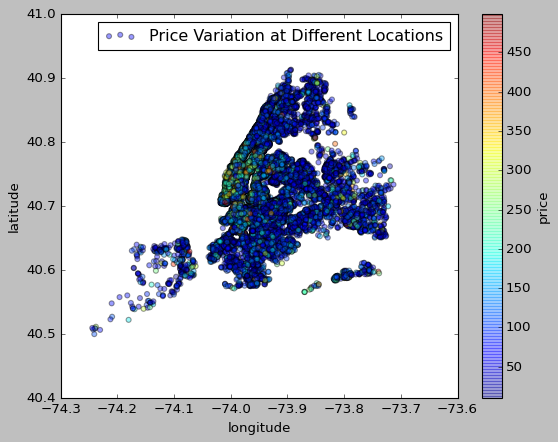

In [40]:
#Understanding the Price distribution for Different Cordinates.
plt.style.use('classic')
plt.figure(figsize=(12,10))
ax=df[df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='Price Variation at Different Locations',c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

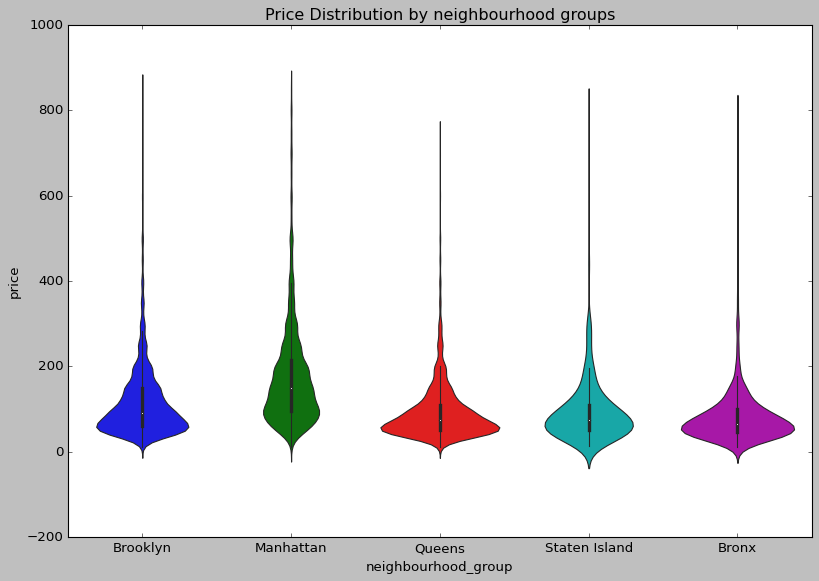

In [41]:
# Understanding the Price Distribution of different Neighbourhood Group using a very beautiful Violin Plot.
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=df).set_title('Price Distribution by neighbourhood groups')
plt.show()

We can see that Manhattan has a higher price range with evenly distributed price range compare to others and is the most expensive one. Brooklyn has the second-highest rental prices, while the Bronx appears as the most affordable one.

  neighbourhood_group  number_of_reviews
1            Brooklyn             483458
2           Manhattan             450475
3              Queens             156596
0               Bronx              28227
4       Staten Island              11541


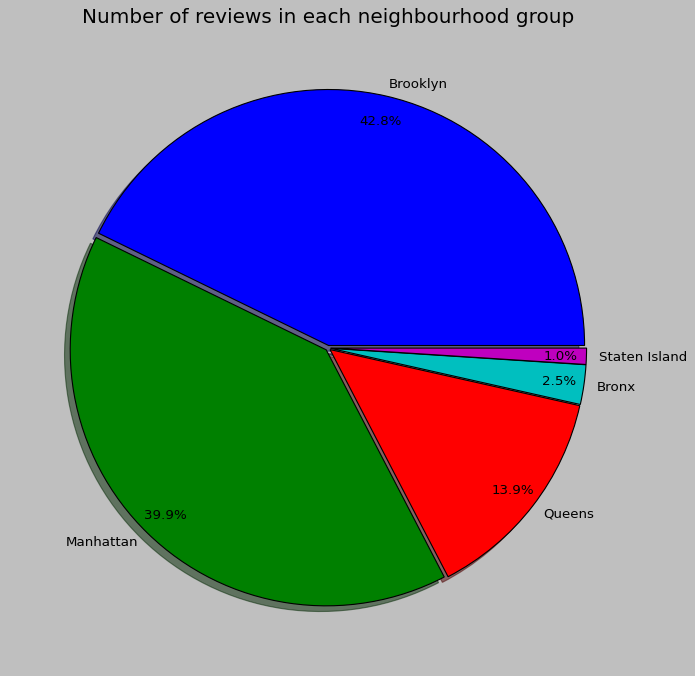

In [63]:
# Checking neighbourhood group which has More number of reviews. 
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].aggregate(np.sum).reset_index().sort_values('number_of_reviews', ascending = False)
print(areas_reviews)

# Lets Visualise the number of reviews in each neighbourhood group using pie chart.
plt.rcParams['figure.figsize'] = (15,10)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.1f%%', startangle =0,pctdistance=.9,labeldistance=1.05, explode = [0.01,0.01,0.01,0.01,0.01], shadow = True )
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 18})
plt.show()

Maximum Reviews are for Brooklyn followed by Manhatten Group and least number of total reviews are for Staten Island.

## **Which hosts are the busiest and why?**

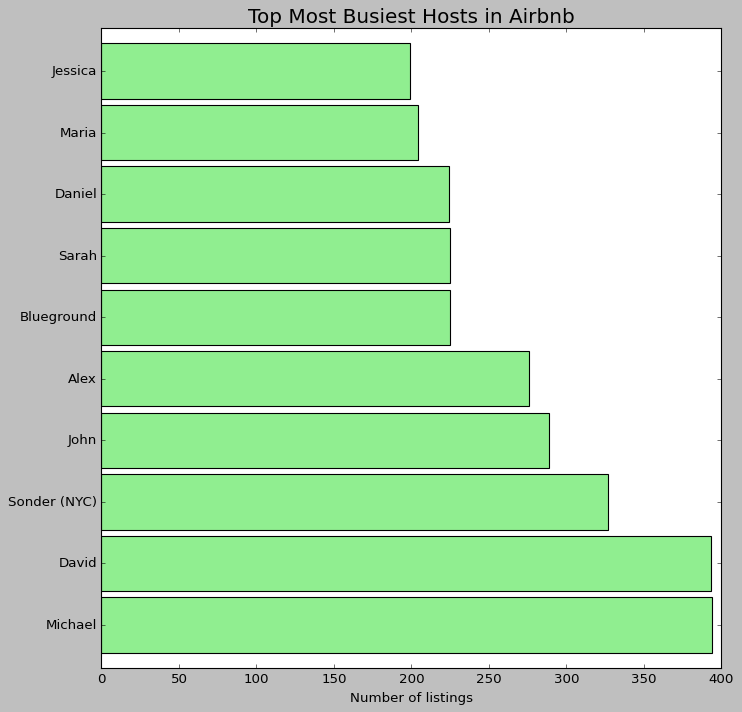

In [62]:
#Top Most Busiest Hosts in Airbnb

feq=df['host_name'].value_counts().sort_values(ascending=False)
feq[:10].plot.barh(figsize=(10, 10), color= "lightgreen", width=0.9)
plt.title("Top Most Busiest Hosts in Airbnb", fontsize=18)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [47]:
# Let's see Top 10 Hosts which has the most listings with their neighbourhood.
host_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(10)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13082,Sonder (NYC),Manhattan,327
1806,Blueground,Brooklyn,232
1807,Blueground,Manhattan,232
7205,Kara,Manhattan,121
7407,Kazuya,Manhattan,103
7408,Kazuya,Queens,103
7406,Kazuya,Brooklyn,103
6477,Jeremy & Laura,Manhattan,96
13081,Sonder,Manhattan,96
2866,Corporate Housing,Manhattan,91


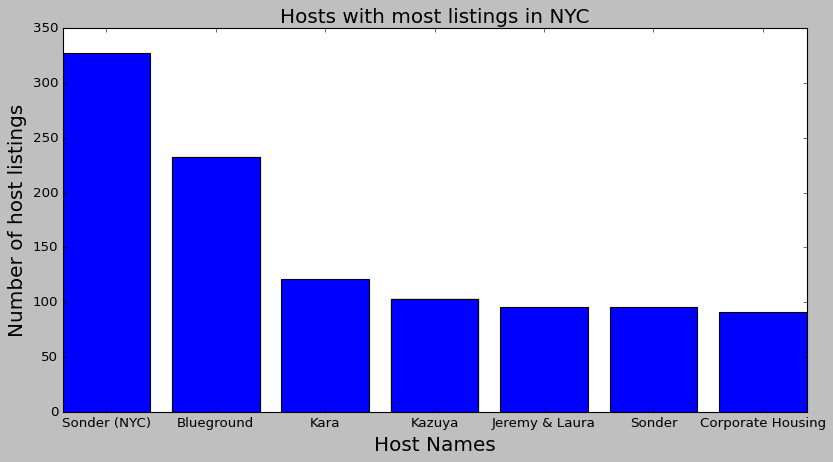

In [48]:
# Let's see Top 10 Hosts which has the most listings with their neighbourhood.

plt.rcParams['figure.figsize'] = (12,6)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

In [45]:
# Lets Find of Busiest Host by Total Night Stay of all customer.
busiest_hosts_by_total_night_stay = df.groupby(['host_name','host_id','room_type','neighbourhood_group'])['minimum_nights'].aggregate(np.sum).reset_index().sort_values('minimum_nights')
busiest_hosts_by_total_night_stay = busiest_hosts_by_total_night_stay.sort_values(by='minimum_nights', ascending=False).head(10)
busiest_hosts_by_total_night_stay

,host_name,host_id,room_type,neighbourhood_group,minimum_nights
4997,Blueground,107434423,Entire home/apt,Manhattan,6720
34143,Sonder (NYC),219517861,Entire home/apt,Manhattan,4337
19505,Kara,30283594,Entire home/apt,Manhattan,3537
17004,Jeremy & Laura,16098958,Entire home/apt,Manhattan,2850
34142,Sonder,12243051,Entire home/apt,Manhattan,2784
8033,Corporate Housing,61391963,Entire home/apt,Manhattan,2760
20321,Ken,22541573,Entire home/apt,Manhattan,2580
20156,Kazuya,137358866,Private room,Queens,2370
29963,Pranjal,200380610,Entire home/apt,Manhattan,1920
37055,Vida,7503643,Entire home/apt,Brooklyn,1560


<BarContainer object of 10 artists>

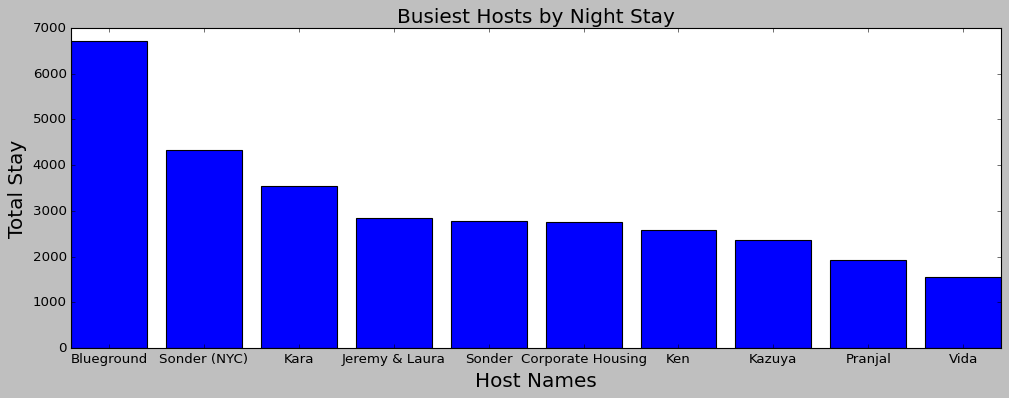

In [46]:
# Visualising the busiest hosts by totay Night stay data through bar plot.
host_name = busiest_hosts_by_total_night_stay['host_name']
stay = busiest_hosts_by_total_night_stay['minimum_nights']
plt.rcParams['figure.figsize'] = (15,5)
plt.title('Busiest Hosts by Night Stay', {'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Total Stay',{'fontsize':18})
plt.bar(host_name, stay)

Considering Parameter to Mesure Busiest Host as **Total No of Night Stay by all Customer** for each Host we see Top 5 Hosts as follows:

- Blueground
- Sonder (NYC)
- Kara
- Jeremy & Laura
- Sonder

##**Other Important Visualisations**

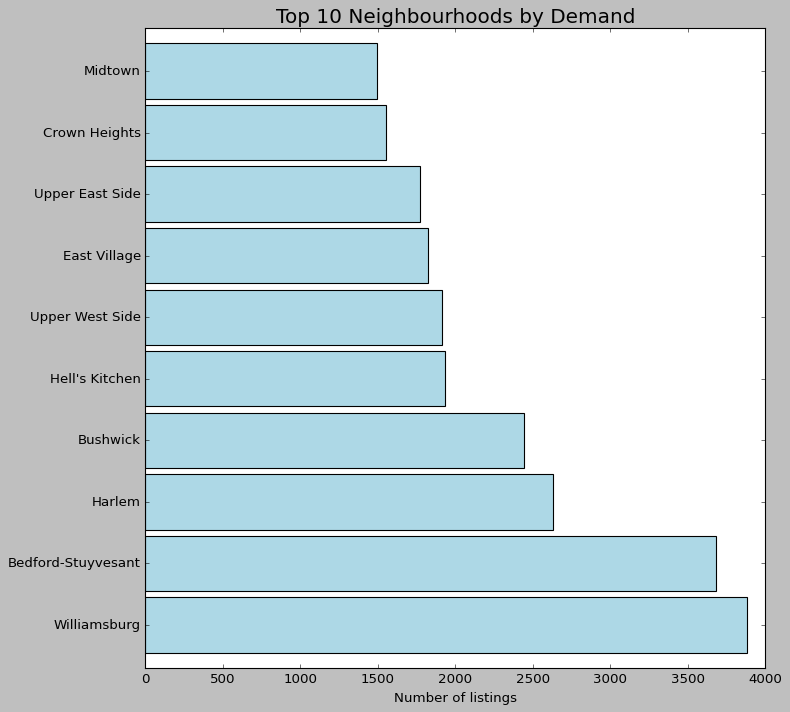

In [58]:
# Lets See who are the Top Neighbourhood in Demand by Number of Listings
feq=df['neighbourhood'].value_counts().sort_values(ascending=False)
feq[:10].plot.barh(figsize=(10, 10), width=0.9, color = 'lightblue')
plt.title("Top 10 Neighbourhoods by Demand", fontsize=18)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

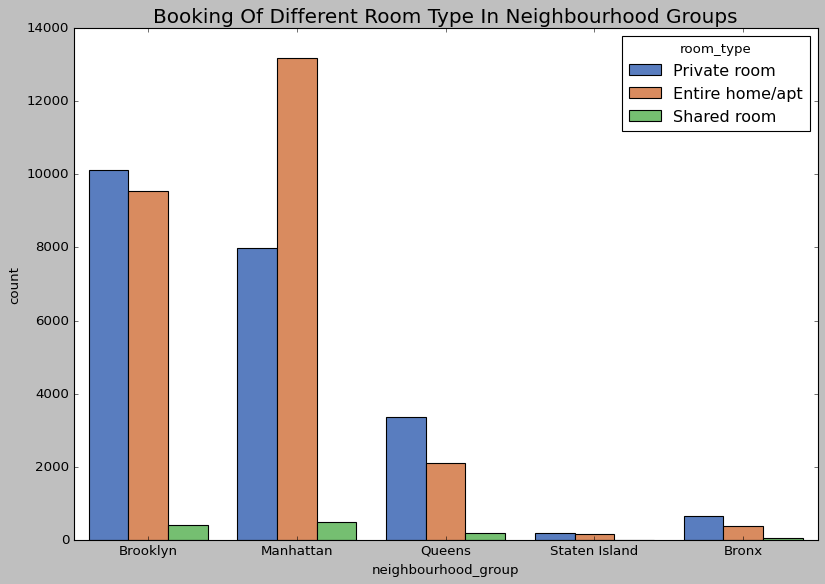

In [ ]:
# Booking Of Different Room Type In Neighbourhood Groups.

plt.figure(figsize=(12,8))
plt.style.use('classic')
plt.title("Booking Of Different Room Type In Neighbourhood Groups",color = 'black',fontsize = 18)
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

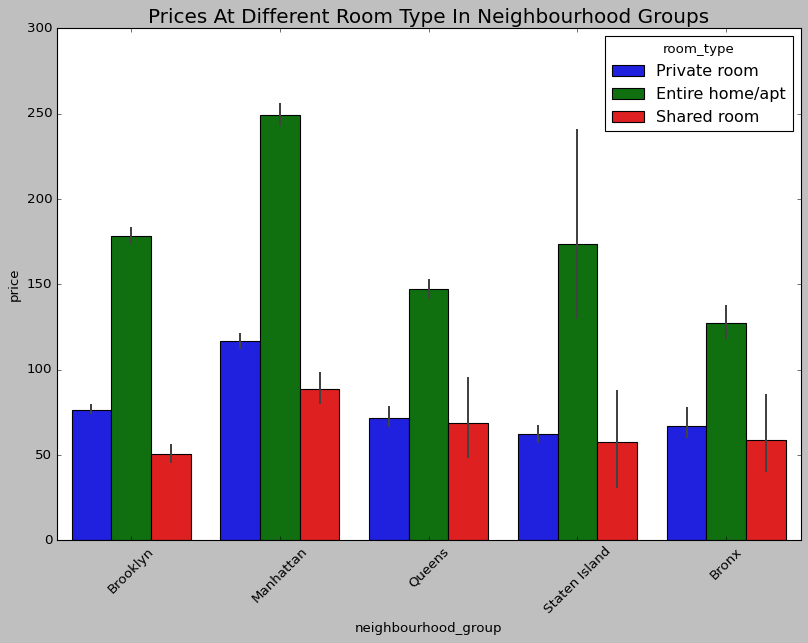

In [ ]:
# Prices Of Different Room Type In Neighbourhood Groups

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Prices Of Different Room Type In Neighbourhood Groups",color = 'black',fontsize = 18)
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

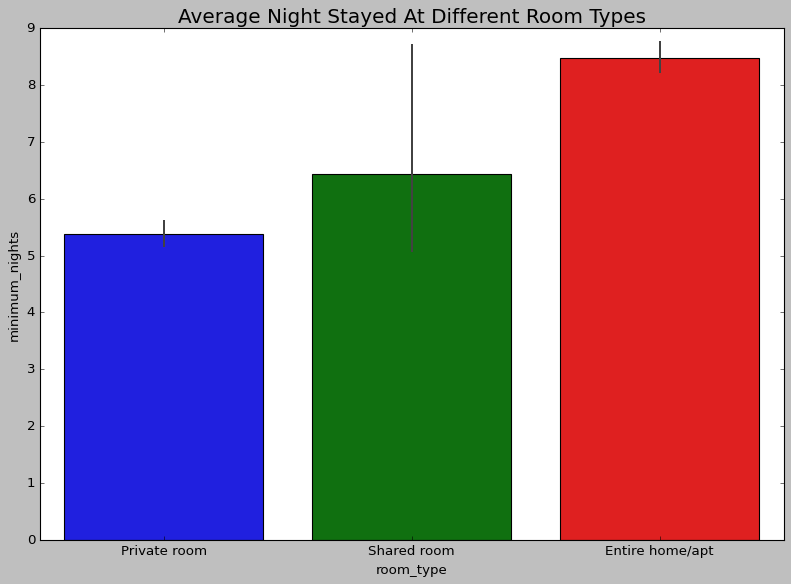

In [ ]:
# Average Night Stayed At Different Room Types

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Night Stayed At Different Room Types",color = 'black',fontsize = 18)
result = df.groupby(["room_type"])['minimum_nights'].aggregate(np.mean).reset_index().sort_values('minimum_nights')
sns.barplot(x='room_type', y="minimum_nights", data=df, order=result['room_type']) 
plt.show()

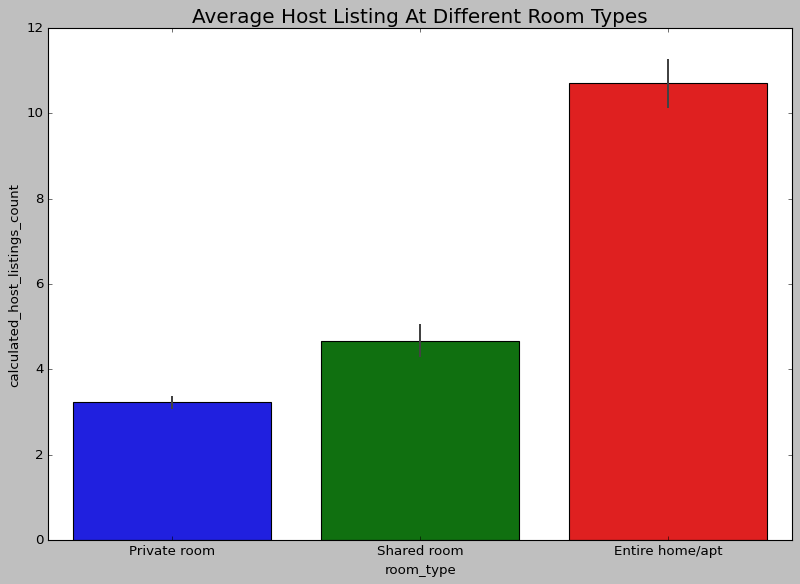

In [ ]:
# Average Host Listing At Different Room Types

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Host Listing At Different Room Types",color = 'black',fontsize = 18)
result = df.groupby(["room_type"])['calculated_host_listings_count'].aggregate(np.mean).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='room_type', y="calculated_host_listings_count", data=df, order=result['room_type'])
plt.show()

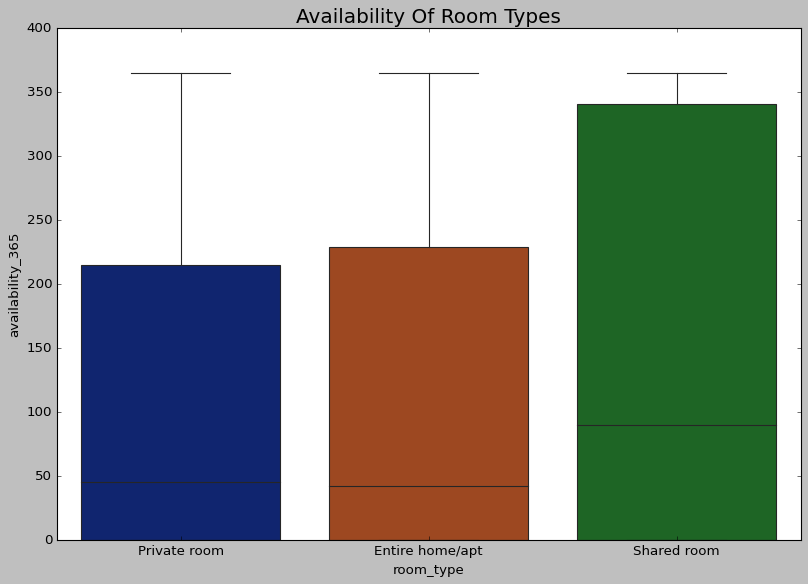

In [ ]:
# Availability Of Room Types

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Availability Of Room Types",color = 'black',fontsize = 18)
sns.boxplot(data=df, x='room_type',y='availability_365',palette="dark")
plt.show() 

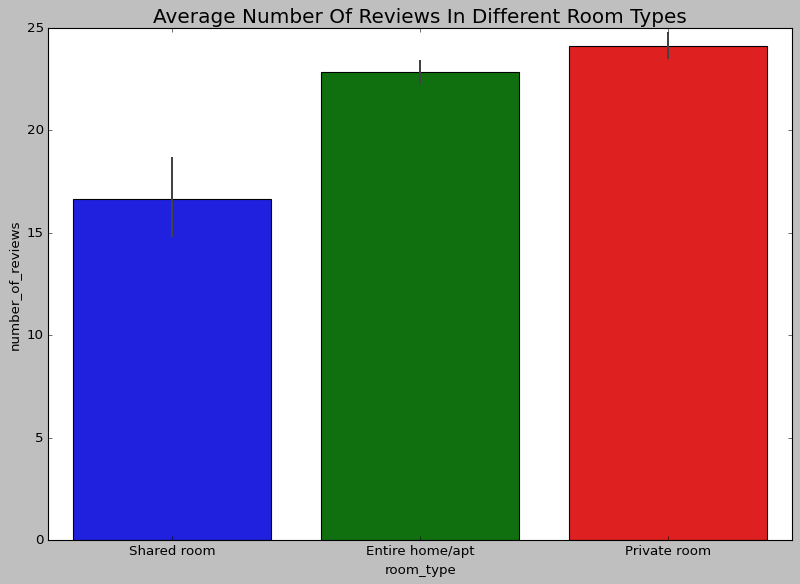

In [ ]:
# Average Number Of Reviews In Different Room Types.

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Number Of Reviews In Different Room Types",color = 'black',fontsize = 18)
result = df.groupby(["room_type"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='room_type', y="number_of_reviews", data=df, order=result['room_type'])
plt.show()

#**8. Key Findings And Other Conclusions**

**Key Findings:** 
1. Manhattan has most number of listings, followed by Brooklyn and Queens. Staten Island has least number of listings.
2. Manhattan and Brooklyn make up for 87% of listings available in NYC.
3. Brooklyn and Manhattan are most liked neighbourhood groups by people.
4. Queens has significantly less host listings than Manhattan. So, we should take enough steps to encourage host listings in Queens.
5. The maximum demand is for private rooms and enitre home/apartment. People are more interested in cheaper rentals.



**Conclusion:**

* We can conclude from the analysis that Manhattan is the Top neighbourhood group by number of listings and highest rental prices 7 out of 10 top Host are from Manhattan followed fy Brooklyn. One of the Probable reason for most preferrend Neighbour Group is that Manhattan is a world-famous for its museums, stores, parks and theatres - and its substantial number of tourists thus attaract Entire Home/Apt as favourate stay options and also stayed longer, as demand is high prices are much higher in this borough.

* At 2nd Brooklyn having significant number of listings and more affordable prices if compared to Manhattan. 

* Rest 3 neighbourhood groups namely Queens, Bronx and Staten island are observing very less listing options available, especially on Staten Island. Considering that those are residential areas, it is possible that many guests choose these locations to save up money or perhaps to visit family and friends who live in this area. 
